# Explore here

In [3]:
# Importo el conjunto de datos
import pandas as pd
df = pd.read_csv ('https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv')

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
# Selecciono las variables de trabajo

df_final = df[['Latitude', 'Longitude', 'MedInc']]
df_final.describe()


,Latitude,Longitude,MedInc
count,20640.000000,20640.000000,20640.000000
mean,35.631861,-119.569704,3.870671
std,2.135952,2.003532,1.899822
min,32.540000,-124.350000,0.499900
25%,33.930000,-121.800000,2.563400
50%,34.260000,-118.490000,3.534800
75%,37.710000,-118.010000,4.743250
max,41.950000,-114.310000,15.000100


In [24]:
# Separo el conjnuto de datos como indica el ejercicio
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos
X_train, X_test = train_test_split(df_final[['Latitude', 'Longitude', 'MedInc']], test_size=0.2, random_state=42)

In [51]:
# KKMeans
from sklearn.cluster import KMeans

# Creo el modelo con 6 clusters
kmeans = KMeans(n_clusters=6, random_state=0)

# Ajusto el modelo a los datos de df_final
kmeans.fit(df_final)

# Obtengo el cluster al que pertenece cada casa
clusters = kmeans.labels_
clusters_series = pd.Series(clusters)
print(clusters_series.value_counts())

0    5385
3    4853
4    4148
1    3475
2    1477
5    1302
Name: count, dtype: int64


In [ ]:
# Agrego el cluster al dataframe
df_final['cluster'] = clusters
df_final['cluster'] = df_final['cluster'].astype('category')

/tmp/ipykernel_2443/1963336361.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['cluster'] = clusters
/tmp/ipykernel_2443/1963336361.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['cluster'] = df_final['cluster'].astype('category')


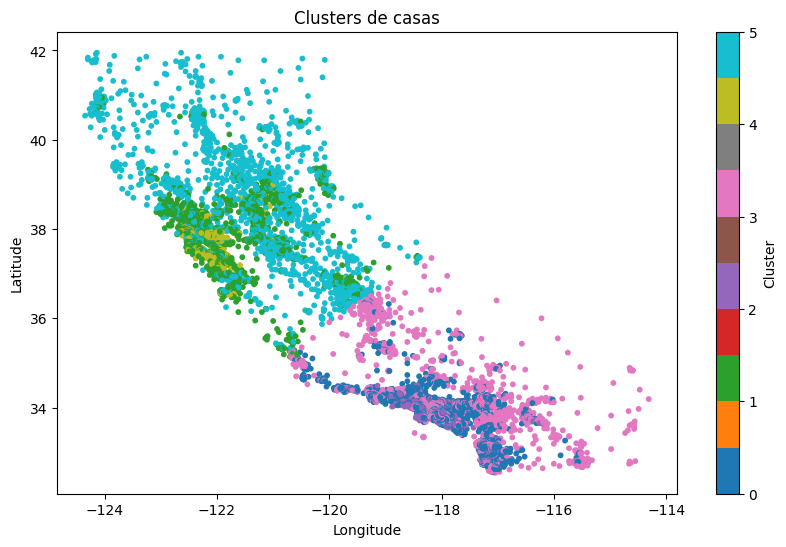

In [ ]:
# Relizo gráfico de clusters

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Graficar los puntos y usar los clusters como color
plt.scatter(df_final['Longitude'], df_final['Latitude'], c=df_final['cluster'].cat.codes, cmap='tab10', s=10)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters de casas')
plt.colorbar(label='Cluster')
plt.show()


In [52]:
# Entreno el modelo con los datos que separé antes
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(X_train)


KMeans(n_clusters=6, random_state=0)

In [ ]:
# Realizo la predicción
test_clusters = kmeans.predict(X_test)

In [ ]:
# Agrego la variable de clusters predichas al X_test
X_test = X_test.copy()
X_test['cluster'] = test_clusters


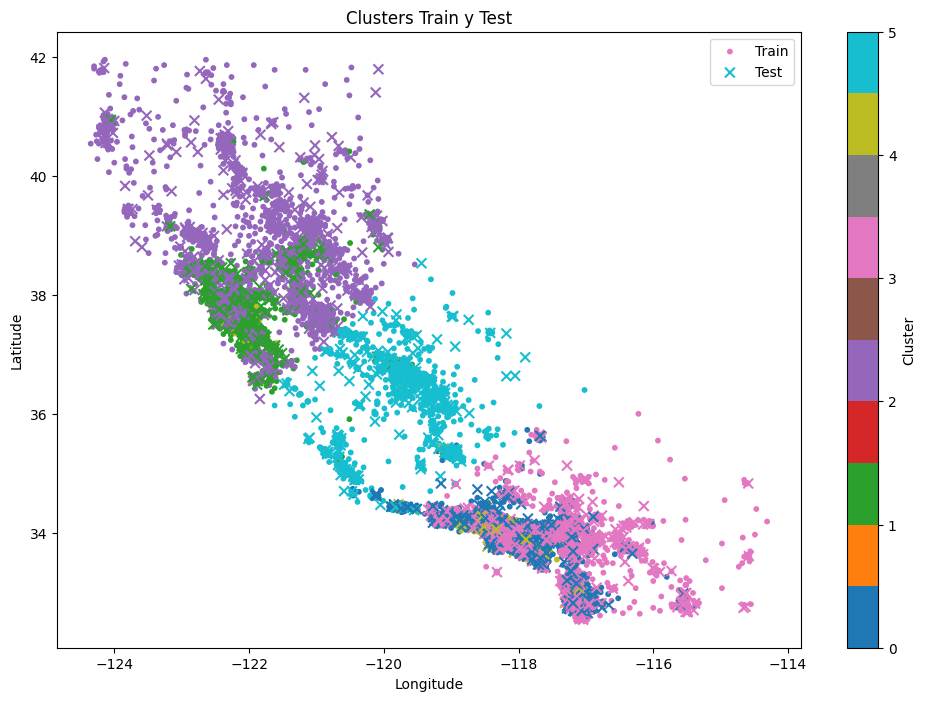

In [ ]:
# Gráfico los datos en clusterse de testeo (con X) y entrenamiento (con puntos)

plt.figure(figsize=(12, 8))

# Puntos del train 
plt.scatter(X_train['Longitude'], X_train['Latitude'], c=kmeans.labels_, cmap='tab10', s=10, label='Train')

# Puntos del test
plt.scatter(X_test['Longitude'], X_test['Latitude'], c=X_test['cluster'], cmap='tab10', s=50, marker='x', label='Test')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters Train y Test')
plt.legend()
plt.colorbar(label='Cluster')
plt.show()


Cómo se observa, las cruces de cada cluster tienden a coincidir con los clusters originales por lo que se espera un buen comportamiento del modelo

In [ ]:
# Hago la verificación del modelo con el cluster como variable categorica objetivo
y_train = kmeans.labels_

# Las etiquetas del conjunto de test las obtuve antes
y_test = test_clusters

TypeError: 'tuple' object is not callable

In [ ]:
# Hago un modelo de decision tree

from sklearn.tree import DecisionTreeClassifier

# Crear el modelo
clf = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [42]:
y_pred_clf = clf.predict(X_test[['Latitude', 'Longitude', 'MedInc']])

In [43]:
from sklearn.metrics import accuracy_score
# Imprimir reporte de métricas
print(accuracy_score(y_test, y_pred_clf))

0.9932170542635659


El accuracy score es muy bueno lo que supone que el modelo predice con precisión el cluster de cada casa

In [ ]:
# Hago el modelo de vecinos más cercanos

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predecir
y_pred_knn = knn.predict(X_test[['Latitude', 'Longitude', 'MedInc']])

from sklearn.metrics import accuracy_score
print (accuracy_score(y_test, y_pred_knn))

0.9924903100775194


Al igual que el modelo anterior, el resultado de la predicción es muy buena. Apenas algo por debajo del Decision Tree

In [ ]:
# Guardo los tres modelos desarrollados

import os
import joblib

# Crear la carpeta si no existe
os.makedirs('modelos', exist_ok=True)

In [46]:
# Guardar el modelo KMeans
joblib.dump(kmeans, 'modelos/kmeans_model.pkl')

# Guardar el modelo Decision Tree
joblib.dump(clf, 'modelos/decision_tree_model.pkl')

# Guardar el modelo K-Nearest Neighbors
joblib.dump(knn, 'modelos/knn_model.pkl')


['modelos/knn_model.pkl']